# Visualisations: Adding the necessary Finishing touches

### Importing Required Libraries

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

color = ['#1C3578', '#ee1c25']
china_hexa = '#ee1c25'
rusia_hexa = '#1C3578'

In [5]:
df = pd.read_feather('Data/wikiarticles_seg_data.feather')

# Combine month and year into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

In [6]:
df

,title,text,file_id,month,year,article_name,category,date
0,"Ancestry, early life and education","place = Leningrad, Soviet Union(now Saint Pete...",547292831,03,2013,Vladimir Putin,Origins,2013-03-01
1,KGB career,"Putin was born on October , in Leningrad, RSF...",547292831,03,2013,Vladimir Putin,Carreer Progression,2013-03-01
2,Early political career,uniform]] Putin joined the KGB in upon gradua...,547292831,03,2013,Vladimir Putin,Carreer Progression,2013-03-01
3,First Premiership (1999),"In May , Putin was appointed Mayor Sobchak's a...",547292831,03,2013,Vladimir Putin,Leadership Tenures,2013-03-01
4,First Presidential term (2000–2004),"On August , Vladimir Putin was appointed one ...",547292831,03,2013,Vladimir Putin,Leadership Tenures,2013-03-01
...,...,...,...,...,...,...,...,...
311505,External links,22T07::52Z Wugui~enwiki wikitext text/xwiki ...,23736605,09,2005,Xi Jinping,References,2005-09-01
311507,External links,22T09::58Z Wugui~enwiki wikitext text/xwiki ...,23739709,09,2005,Xi Jinping,References,2005-09-01
311509,External links,22T07::28Z Wugui~enwiki wikitext text/xwiki ...,23736760,09,2005,Xi Jinping,References,2005-09-01
311513,External links,10T02::39Z NormanEinstein Bolded title; forma...,17635525,06,2005,Xi Jinping,References,2005-06-01


In [7]:
df.category.value_counts()

category
References             79567
Carreer Progression    39377
Leadership Tenures     37817
Public Imaage          30260
Personal Details       27275
Origins                19741
Recognition            18984
policy                 18280
Communications         10154
Assessment              5315
Name: count, dtype: int64

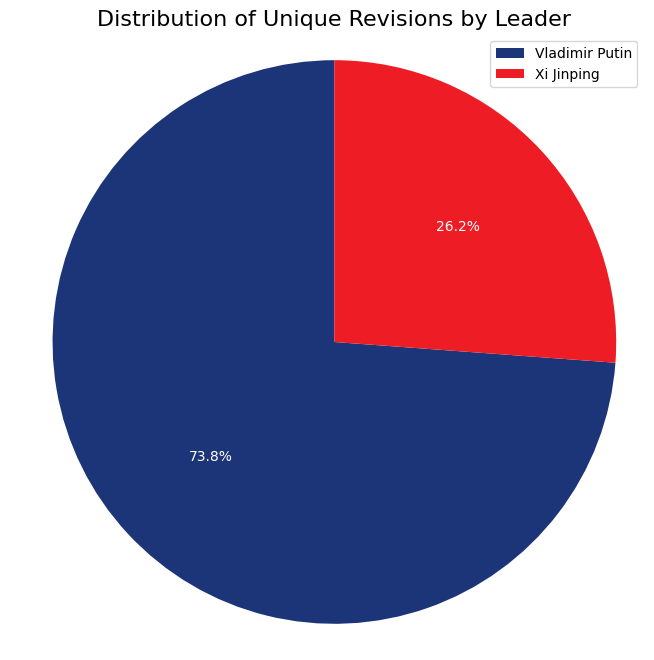

In [8]:
# Count unique file_ids for each leader
putin_count = df[df['article_name'] == 'Vladimir Putin']['file_id'].nunique()
xi_count = df[df['article_name'] == 'Xi Jinping']['file_id'].nunique()

# Prepare data for the pie chart
labels = ['Vladimir Putin', 'Xi Jinping']
sizes = [putin_count, xi_count]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, labels=labels, 
    autopct=lambda pct: f'{pct:.1f}%',  # Formatting percentage
    startangle=90, 
    colors=['#1C3578', '#ee1c25'],
    textprops={'color': 'white'},  # Set inside font color to white
)
plt.title('Distribution of Unique Revisions by Leader', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

# Show the pie chart
plt.show()

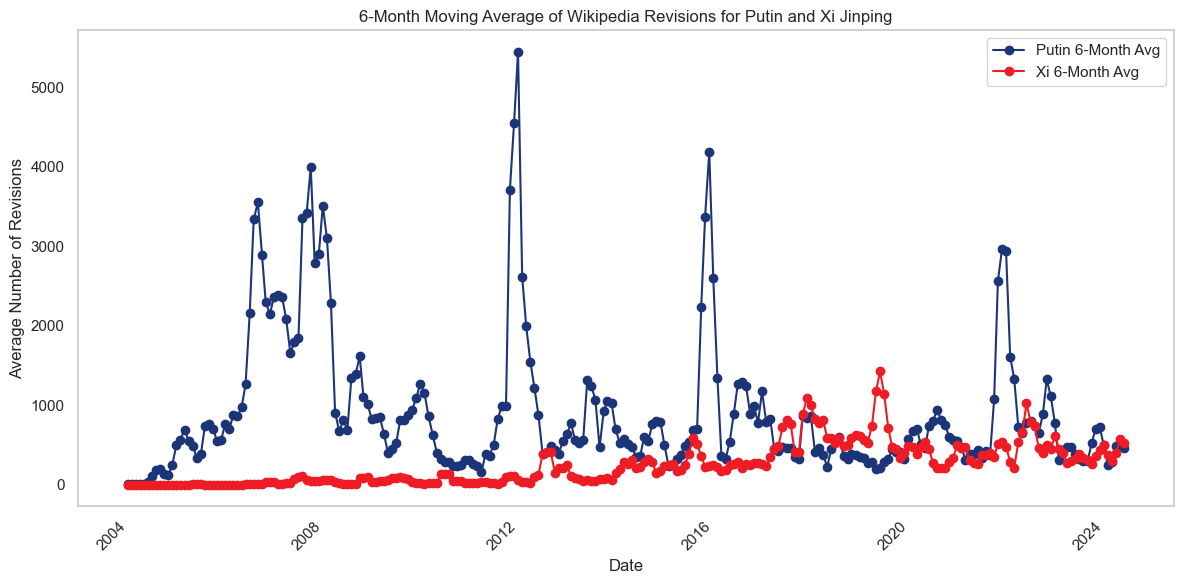

In [37]:
df_putin = df[df.article_name=='Vladimir Putin']
df_xi = df[df.article_name=='Xi Jinping']

# Counting monthly revisions for both individuals
putin_counts = df_putin.groupby(['year', 'month']).size().reset_index(name='putin_revisions')
xi_counts = df_xi.groupby(['year', 'month']).size().reset_index(name='xi_revisions')

# Merging the counts on year and month
merged_counts = pd.merge(putin_counts, xi_counts, on=['year', 'month'], how='outer').fillna(0)

# Creating a 'date' column for plotting
merged_counts['date'] = pd.to_datetime(merged_counts[['year', 'month']].assign(day=1))

# Calculating 6-month moving averages
merged_counts['putin_moving_avg'] = merged_counts['putin_revisions'].rolling(window=3).mean()
merged_counts['xi_moving_avg'] = merged_counts['xi_revisions'].rolling(window=3).mean()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(merged_counts['date'], merged_counts['putin_moving_avg'], marker='o', label='Putin 6-Month Avg', color=rusia_hexa)
plt.plot(merged_counts['date'], merged_counts['xi_moving_avg'], marker='o', label='Xi 6-Month Avg', color=china_hexa)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Number of Revisions')
plt.title('6-Month Moving Average of Wikipedia Revisions for Putin and Xi Jinping')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

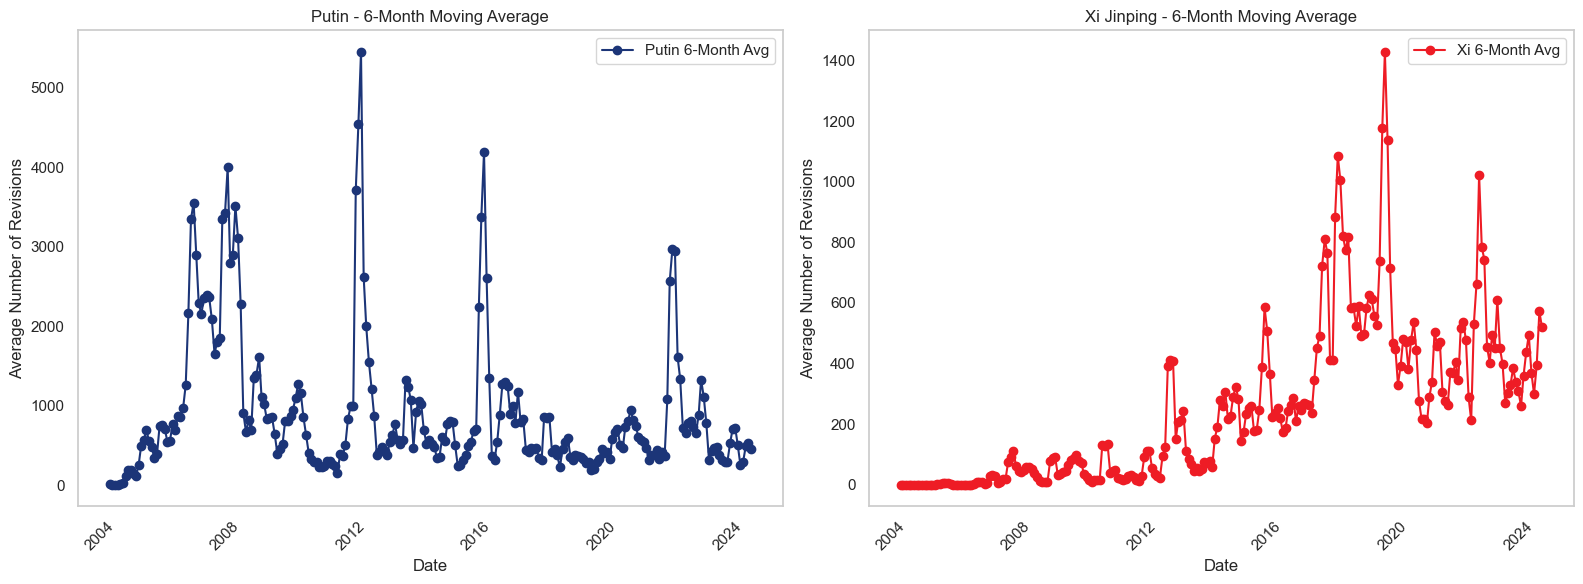

In [38]:
# Filtering data for Putin and Xi
df_putin = df[df.article_name == 'Vladimir Putin']
df_xi = df[df.article_name == 'Xi Jinping']

# Counting monthly revisions for both individuals
putin_counts = df_putin.groupby(['year', 'month']).size().reset_index(name='putin_revisions')
xi_counts = df_xi.groupby(['year', 'month']).size().reset_index(name='xi_revisions')

# Merging the counts on year and month
merged_counts = pd.merge(putin_counts, xi_counts, on=['year', 'month'], how='outer').fillna(0)

# Creating a 'date' column for plotting
merged_counts['date'] = pd.to_datetime(merged_counts[['year', 'month']].assign(day=1))

# Calculating 3-month moving averages
merged_counts['putin_moving_avg'] = merged_counts['putin_revisions'].rolling(window=3).mean()
merged_counts['xi_moving_avg'] = merged_counts['xi_revisions'].rolling(window=3).mean()

# Plotting the results in subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Putin's data on the left subplot
ax1.plot(merged_counts['date'], merged_counts['putin_moving_avg'], marker='o', label='Putin 6-Month Avg', color=rusia_hexa)
ax1.set_title('Putin - 6-Month Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Number of Revisions')
ax1.legend()
ax1.grid()
ax1.tick_params(axis='x', rotation=45)



# Plotting Xi's data on the right subplot
ax2.plot(merged_counts['date'], merged_counts['xi_moving_avg'], marker='o', label='Xi 6-Month Avg', color=china_hexa)
ax2.set_title('Xi Jinping - 6-Month Moving Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Number of Revisions')
ax2.legend()
ax2.grid()
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Analysis of Wikipedia Revision Categories as % for Vladimir Putin and Xi Jinping
The data is grouped by category to compute the percentage of total revisions for each leader. Finally, a bar plot displays the percentage distribution, sorted by total revision percentage across both leaders.

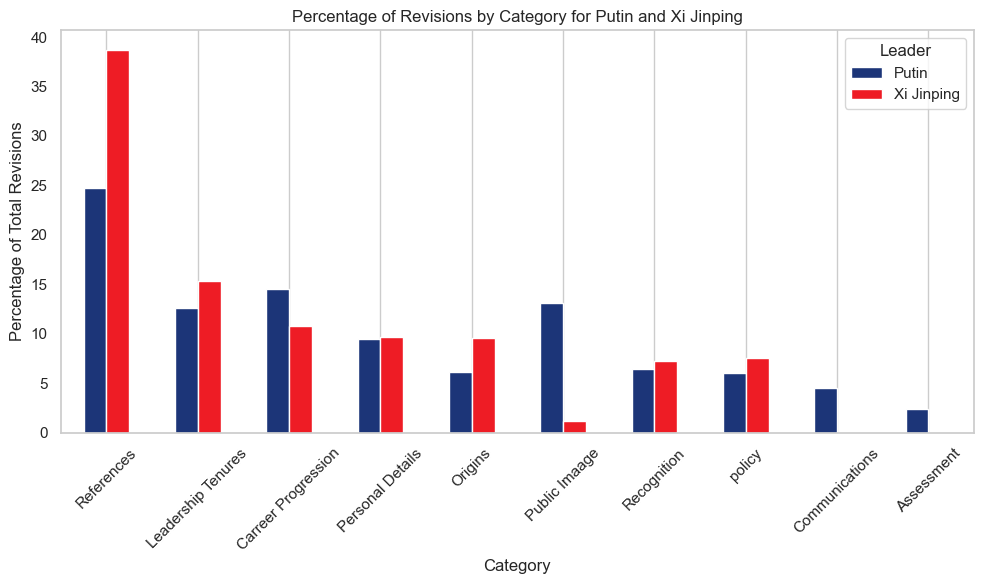

In [32]:
category_counts = df.groupby(['article_name', 'category']).size().reset_index(name='count')

# Calculate total counts for each leader
total_counts = category_counts.groupby('article_name')['count'].sum().reset_index()
total_counts.columns = ['article_name', 'total_count']

# Merge total counts back to category counts
merged_counts = pd.merge(category_counts, total_counts, on='article_name')
merged_counts['percentage'] = (merged_counts['count'] / merged_counts['total_count']) * 100

# Step 2: Pivot data and sort by total percentage
# Pivot the data for plotting
plot_data = merged_counts.pivot(index='category', columns='article_name', values='percentage').fillna(0)

# Calculate total percentage across both leaders for sorting
plot_data['total_percentage'] = plot_data.sum(axis=1)
plot_data = plot_data.sort_values(by='total_percentage', ascending=False)
plot_data = plot_data.drop(columns='total_percentage')  # Drop total after sorting

# Plotting with custom colors
plot_data.plot(kind='bar', figsize=(10, 6), color=['#1C3578', '#ee1c25'])
plt.title('Percentage of Revisions by Category for Putin and Xi Jinping')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Revisions')
plt.xticks(rotation=45)
plt.legend(['Putin', 'Xi Jinping'], title='Leader')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Inference**

- There appears to be an overcorrection in the number of references and public image details for both Xi Jinping and Putin, potentially due to:
  - The substantial volume of minutes and documents released from CCP meetings.
  - China’s active involvement in regions such as Africa and the Global South.
  - A possible increase in fact-checking effort after the Russia Ukraine war.

- The categories of leadership tenure, career progression, and personal life remain stable for both leaders. This likely reflects:
  - The enduring nature of their respective regimes.
  - Their relatively private, uneventful, and discreet personal lives.

In [9]:
df.year[]

,title,text,file_id,month,year,article_name,category,date
0,"Ancestry, early life and education","place = Leningrad, Soviet Union(now Saint Pete...",547292831,03,2013,Vladimir Putin,Origins,2013-03-01
1,KGB career,"Putin was born on October , in Leningrad, RSF...",547292831,03,2013,Vladimir Putin,Carreer Progression,2013-03-01
2,Early political career,uniform]] Putin joined the KGB in upon gradua...,547292831,03,2013,Vladimir Putin,Carreer Progression,2013-03-01
3,First Premiership (1999),"In May , Putin was appointed Mayor Sobchak's a...",547292831,03,2013,Vladimir Putin,Leadership Tenures,2013-03-01
4,First Presidential term (2000–2004),"On August , Vladimir Putin was appointed one ...",547292831,03,2013,Vladimir Putin,Leadership Tenures,2013-03-01
...,...,...,...,...,...,...,...,...
311505,External links,22T07::52Z Wugui~enwiki wikitext text/xwiki ...,23736605,09,2005,Xi Jinping,References,2005-09-01
311507,External links,22T09::58Z Wugui~enwiki wikitext text/xwiki ...,23739709,09,2005,Xi Jinping,References,2005-09-01
311509,External links,22T07::28Z Wugui~enwiki wikitext text/xwiki ...,23736760,09,2005,Xi Jinping,References,2005-09-01
311513,External links,10T02::39Z NormanEinstein Bolded title; forma...,17635525,06,2005,Xi Jinping,References,2005-06-01


In [19]:
# Filter out the 'References' category
df = df[df.category != 'References']

# Filter rows containing the word 'authoritarian'
df_authoritarian = df[df['text'].str.contains('authoritarian', case=False, na=False)]

# Create a 'month_year' column in "MM-YYYY" format
df_authoritarian['month_year'] = df_authoritarian['month'].astype(str).str.zfill(2) + '-' + df_authoritarian['year'].astype(str)

# Group by 'month_year' and 'article_name' to count occurrences
authoritarian_counts = df_authoritarian.groupby(['month_year', 'article_name']).size().reset_index(name='count')

# Pivot the data for better visualization
authoritarian_pivot = authoritarian_counts.pivot(index='month_year', columns='article_name', values='count').fillna(0)


C:\Users\Shreyansh Padarha\AppData\Local\Temp\ipykernel_55300\129208629.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_authoritarian['month_year'] = df_authoritarian['month'].astype(str).str.zfill(2) + '-' + df_authoritarian['year'].astype(str)


In [20]:
authoritarian_counts

,month_year,article_name,count
0,01-2013,Vladimir Putin,27
1,01-2014,Vladimir Putin,65
2,01-2015,Vladimir Putin,20
3,01-2016,Vladimir Putin,53
4,01-2016,Xi Jinping,25
...,...,...,...
264,12-2021,Xi Jinping,21
265,12-2022,Vladimir Putin,35
266,12-2022,Xi Jinping,72
267,12-2023,Vladimir Putin,50


In [21]:
authoritarian_pivot

article_name,Vladimir Putin,Xi Jinping
month_year,,
01-2013,27.0,0.0
01-2014,65.0,0.0
01-2015,20.0,0.0
01-2016,53.0,25.0
01-2017,81.0,31.0
...,...,...
12-2019,24.0,0.0
12-2020,66.0,12.0
12-2021,48.0,21.0


<Axes: xlabel='count', ylabel='year'>

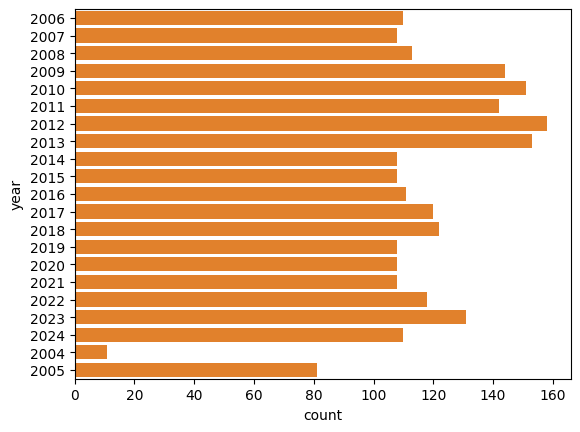

In [ ]:
sns.countplot(filtered_df[filtered_df.article_name=='Xi Jinping'].year.sort_values())
sns.countplot(filtered_df[filtered_df.article_name=='Vladimir Putin'].year.sort_values())